## CANADA GOOSE INDUSTRY PROJECT X BRAINSTATION
by **AUDREY EMERIBE

![](https://altitude-blog.com/wp-content/uploads/2018/11/Banniere-Blog-Canada-Goose.jpg)

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt # for data visualization and plots
%matplotlib inline
import seaborn as sns

# For machine learning analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

np.random.seed(12345)

In [2]:
from pandas import read_excel
my_sheet = 'Sheet1' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = 'CG_Reviews_BrainStation_Shared.xlsx' # change it to the name of your excel file
df = read_excel(file_name, sheet_name = my_sheet, engine='openpyxl')
df = df.set_index('Surrogate_Review_ID')
df # shows headers with top 5 rows

,Submission_Date,Initial_Publish_Date,Moderation_Status,Product_ID,Product_Name,BV_FE_EXPAND,BV_FE_FAMILY,BV_FE_FAMILY.1,Product_Name_CLEAN,Product_SKU,...,Comfort_How_would_you_rate_the_comfort_of_the_product?,Fit_Too_small/Too_big,Quality_of_Product_How_would_you_rate_the_quality_of_this_product?,Recommend_to_a_Friend,Review_Text,#_of_Helpful_Votes,#_of_Not_Helpful_Votes,Age,How_would_you_rate_the_fit_of_this_product?,Product_Page_URL
Surrogate_Review_ID,,,,,,,,,,,,,,,,,,,,,
1,2022-06-20 07:26:06,2022-06-20 07:45:07,APPROVED,7102W1,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,5.0,Yes,So comfortable and cozy and nice looking_x000D...,0,0,50 to 64,NaN,NaN
2,2022-06-18 21:23:25,2022-06-18 21:45:05,APPROVED,2715M,Men’s Hybridge Lite Tech Down Vest,BV_FE_FAMILY:2715M-family,2715M-family,2715M-family,MEN’S HYBRIDGE LITE TECH DOWN VEST,2715M,...,1.0,3.0,2.0,No,I bought this for a fishing trip with temperat...,0,0,NaN,NaN,https://www.canadagoose.com/se/en/men%E2%80%99...
3,2022-06-18 04:48:03,2022-06-18 09:15:06,APPROVED,628343084992,PBI Freestyle Vest,BV_FE_FAMILY:4154MPB-family,4154MPB-family,4154MPB-family,Men'S Freestyle Crew Vest,4154MPB,...,5.0,3.0,5.0,Yes,Fantastic faultless quality very pretty colour...,0,0,35 to 49,NaN,https://www.canadagoose.com/se/en/pbi-freestyl...
4,2022-06-17 11:25:37,2022-06-18 09:15:06,APPROVED,628343764986,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,3.0,5.0,Yes,This raincoat ticked all the boxes for me. It’...,0,0,50 to 64,NaN,NaN
5,2022-06-15 20:32:41,2022-06-16 21:00:04,APPROVED,7000M,Amherst Hoody,BV_FE_FAMILY:7000M-family,7000M-family,7000M-family,Amherst Hoody,7000M,...,NaN,NaN,5.0,Yes,"I recently ordered this as a gift, when I rec...",0,0,35 to 49,NaN,https://www.canadagoose.com/se/en/amherst-hood...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24838,2015-11-21 06:32:27,2015-11-24 11:00:26,APPROVED,2062M,Langford Parka,BV_FE_FAMILY:2062M-family,2062M-family,2062M-family,Langford Parka,2062M,...,NaN,NaN,NaN,No,"Why, why, why did CG put the zipper on the Lan...",5,5,55to64,Fits true to size,https://www.canadagoose.com/se/en/langford-par...
24839,2015-11-20 20:40:49,2015-11-22 22:00:10,APPROVED,5055L,Women's Camp Down Hoody,BV_FE_FAMILY:5055L-family,5055L-family,5055L-family,Camp Hoody,5055L,...,NaN,NaN,NaN,Yes,"In my humble opinion, a drop tail should not e...",2,8,65 or over,Fits true to size,https://www.canadagoose.com/se/en/womens-camp-...
24840,2015-11-20 15:50:15,2015-11-22 17:00:09,APPROVED,3035L,Mystique Parka,BV_FE_FAMILY:3035L-family,3035L-family,3035L-family,Mystique Parka,3035L,...,NaN,NaN,NaN,Yes,I bought my Mystique last February and made it...,156,19,18 to 24,Fits true to size,https://www.canadagoose.com/se/en/mystique-par...


In [3]:
df.describe()

,Overall_Rating,Comfort_How_would_you_rate_the_comfort_of_the_product?,Fit_Too_small/Too_big,Quality_of_Product_How_would_you_rate_the_quality_of_this_product?,#_of_Helpful_Votes,#_of_Not_Helpful_Votes
count,24842.000000,16327.000000,16218.000000,16392.000000,24842.000000,24842.000000
mean,4.413292,4.664115,3.845912,4.567472,2.410031,0.696764
std,1.123431,0.845465,1.093686,1.021141,9.200493,3.548775
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,5.000000,3.000000,5.000000,0.000000,0.000000
50%,5.000000,5.000000,4.000000,5.000000,0.000000,0.000000
75%,5.000000,5.000000,5.000000,5.000000,1.000000,0.000000
max,5.000000,5.000000,5.000000,5.000000,299.000000,188.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24842 entries, 1 to 24842
Data columns (total 26 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Submission_Date                                                     24842 non-null  datetime64[ns]
 1   Initial_Publish_Date                                                24842 non-null  datetime64[ns]
 2   Moderation_Status                                                   24842 non-null  object        
 3   Product_ID                                                          24842 non-null  object        
 4   Product_Name                                                        24818 non-null  object        
 5   BV_FE_EXPAND                                                        24818 non-null  object        
 6   BV_FE_FAMILY                                          

In [5]:
# Check the percentage of missing/null values 
df.isna().sum()/df.shape[0]*100

Submission_Date                                                        0.000000
Initial_Publish_Date                                                   0.000000
Moderation_Status                                                      0.000000
Product_ID                                                             0.000000
Product_Name                                                           0.096611
BV_FE_EXPAND                                                           0.096611
BV_FE_FAMILY                                                           0.096611
BV_FE_FAMILY.1                                                         0.096611
Product_Name_CLEAN                                                     0.096611
Product_SKU                                                            0.096611
Category                                                               0.096611
Category_Consolidated                                                  0.096611
Review_Title                            

In [6]:
# Check for null values
for col in df.columns:
    
    if df[col].isnull().sum() > 0:
        
        print(col, df[col].isnull().sum())

Product_Name 24
BV_FE_EXPAND 24
BV_FE_FAMILY 24
BV_FE_FAMILY.1 24
Product_Name_CLEAN 24
Product_SKU 24
Category 24
Category_Consolidated 24
Review_Title 2145
User_Location 3492
Comfort_How_would_you_rate_the_comfort_of_the_product? 8515
Fit_Too_small/Too_big 8624
Quality_of_Product_How_would_you_rate_the_quality_of_this_product? 8450
Recommend_to_a_Friend 1569
Age 1777
How_would_you_rate_the_fit_of_this_product? 17452
Product_Page_URL 24


In [7]:
df['Age'].value_counts()

35 to 49           7833
50 to 64           4346
25 to 34           4295
18 to 24           2370
65 or over          946
25 bis 34           484
35 à 49 ans         472
17 or under         468
50 à 64 ans         262
45 bis 49           262
50 bis 64           255
25 à 34 ans         247
18 bis 24           186
Under 18            152
18 à 24 ans         135
35to44              118
55to64               44
17 oder jünger       42
65 ans ou plus       36
25 - 34              28
35-49                24
Moins de 17 ans      23
65 oder älter        20
50-64                 9
18 - 24               5
17 岁或以下               3
Name: Age, dtype: int64

In [8]:
df['Age'] = df['Age'].map({'35 to 49': '35 to 49',
    '50 to 64': '50 to 64',
    '25 to 34': '25 to 34',
    '18 to 24': '18 to 24',
    '65 or over': '65 or over',
    '25 bis 34': '25 to 34',
    '35 à 49 ans': '35 to 49',         
    '17 or under': '17 or under',         
    '50 à 64 ans': '50 to 64',      
    '45 bis 49': '35 to 49',         
    '50 bis 64': '50 to 64',          
    '25 à 34 ans': '25 to 34',        
    '18 bis 24': '18 to 24',          
    'Under 18': '17 or under',          
    '18 à 24 ans': '18 to 24',        
    '35to44': '35 to 49',             
    '55to64': '50 to 64',              
    '17 oder jünger': '17 or under',     
    '65 ans ou plus': '65 or over',      
    '25 - 34': '25 to 34',             
    '35-49': '35 to 49',               
    'Moins de 17 ans': '17 or under',     
    '65 oder älter': '65 or over',       
    '50-64': '50 to 64',                
    '18 - 24': '18 to 24',              
    '17 岁或以下': '17 or under'               
    })

In [9]:
df['Age'].value_counts()

35 to 49       8709
25 to 34       5054
50 to 64       4916
18 to 24       2696
65 or over     1002
17 or under     688
Name: Age, dtype: int64

In [10]:
df['User_Location'].value_counts()

London                        509
Toronto                       502
New York                      309
Chicago                       286
New York, NY                  251
                             ... 
East Grinstead West Sussex      1
Bangor, North Wales             1
Dublin, Irl.                    1
Fort Worth Texas                1
WS, NC                          1
Name: User_Location, Length: 6892, dtype: int64

In [11]:
# we can use .str.split to split on comma
df['User_Location'] = df['User_Location'].str.split(',', expand=True).loc[:,0]

In [12]:
df['User_Location'].value_counts()

Toronto           1046
New York           808
London             733
Chicago            641
Boston             427
                  ... 
London England       1
San francisco        1
bei Dresden          1
Dallas Tx            1
WS                   1
Name: User_Location, Length: 5106, dtype: int64

**OBSERVATIONS**
- We can see customers from 3 major cities: Toronto, New York and London

In [13]:
df['Reviews']= np.where(df['Overall_Rating'] >= 5, 'positive', 'negative')
df

,Submission_Date,Initial_Publish_Date,Moderation_Status,Product_ID,Product_Name,BV_FE_EXPAND,BV_FE_FAMILY,BV_FE_FAMILY.1,Product_Name_CLEAN,Product_SKU,...,Fit_Too_small/Too_big,Quality_of_Product_How_would_you_rate_the_quality_of_this_product?,Recommend_to_a_Friend,Review_Text,#_of_Helpful_Votes,#_of_Not_Helpful_Votes,Age,How_would_you_rate_the_fit_of_this_product?,Product_Page_URL,Reviews
Surrogate_Review_ID,,,,,,,,,,,,,,,,,,,,,
1,2022-06-20 07:26:06,2022-06-20 07:45:07,APPROVED,7102W1,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,5.0,Yes,So comfortable and cozy and nice looking_x000D...,0,0,50 to 64,NaN,NaN,positive
2,2022-06-18 21:23:25,2022-06-18 21:45:05,APPROVED,2715M,Men’s Hybridge Lite Tech Down Vest,BV_FE_FAMILY:2715M-family,2715M-family,2715M-family,MEN’S HYBRIDGE LITE TECH DOWN VEST,2715M,...,3.0,2.0,No,I bought this for a fishing trip with temperat...,0,0,NaN,NaN,https://www.canadagoose.com/se/en/men%E2%80%99...,negative
3,2022-06-18 04:48:03,2022-06-18 09:15:06,APPROVED,628343084992,PBI Freestyle Vest,BV_FE_FAMILY:4154MPB-family,4154MPB-family,4154MPB-family,Men'S Freestyle Crew Vest,4154MPB,...,3.0,5.0,Yes,Fantastic faultless quality very pretty colour...,0,0,35 to 49,NaN,https://www.canadagoose.com/se/en/pbi-freestyl...,positive
4,2022-06-17 11:25:37,2022-06-18 09:15:06,APPROVED,628343764986,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,5.0,Yes,This raincoat ticked all the boxes for me. It’...,0,0,50 to 64,NaN,NaN,positive
5,2022-06-15 20:32:41,2022-06-16 21:00:04,APPROVED,7000M,Amherst Hoody,BV_FE_FAMILY:7000M-family,7000M-family,7000M-family,Amherst Hoody,7000M,...,NaN,5.0,Yes,"I recently ordered this as a gift, when I rec...",0,0,35 to 49,NaN,https://www.canadagoose.com/se/en/amherst-hood...,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24838,2015-11-21 06:32:27,2015-11-24 11:00:26,APPROVED,2062M,Langford Parka,BV_FE_FAMILY:2062M-family,2062M-family,2062M-family,Langford Parka,2062M,...,NaN,NaN,No,"Why, why, why did CG put the zipper on the Lan...",5,5,50 to 64,Fits true to size,https://www.canadagoose.com/se/en/langford-par...,negative
24839,2015-11-20 20:40:49,2015-11-22 22:00:10,APPROVED,5055L,Women's Camp Down Hoody,BV_FE_FAMILY:5055L-family,5055L-family,5055L-family,Camp Hoody,5055L,...,NaN,NaN,Yes,"In my humble opinion, a drop tail should not e...",2,8,65 or over,Fits true to size,https://www.canadagoose.com/se/en/womens-camp-...,negative
24840,2015-11-20 15:50:15,2015-11-22 17:00:09,APPROVED,3035L,Mystique Parka,BV_FE_FAMILY:3035L-family,3035L-family,3035L-family,Mystique Parka,3035L,...,NaN,NaN,Yes,I bought my Mystique last February and made it...,156,19,18 to 24,Fits true to size,https://www.canadagoose.com/se/en/mystique-par...,positive


In [14]:
df.drop('How_would_you_rate_the_fit_of_this_product?', axis=1, inplace=True)
df.drop('Product_Page_URL', axis=1, inplace=True)

In [15]:
# use axis=0 to drop rows, 
df = df.dropna(subset=['Product_Name', 'BV_FE_EXPAND', 'BV_FE_FAMILY', 'BV_FE_FAMILY.1', 'Product_Name_CLEAN', 'Product_SKU', 'Category', 'Category_Consolidated',], axis=0)
# Resetting the index of the hotel_df2
df = df.reset_index(drop=True)

In [16]:
df = df[df['User_Location'].notna()]
# Check the percentage of missing/null values 
df.isna().sum()/df.shape[0]*100

Submission_Date                                                        0.000000
Initial_Publish_Date                                                   0.000000
Moderation_Status                                                      0.000000
Product_ID                                                             0.000000
Product_Name                                                           0.000000
BV_FE_EXPAND                                                           0.000000
BV_FE_FAMILY                                                           0.000000
BV_FE_FAMILY.1                                                         0.000000
Product_Name_CLEAN                                                     0.000000
Product_SKU                                                            0.000000
Category                                                               0.000000
Category_Consolidated                                                  0.000000
Review_Title                            

In [17]:
# Dropping missing rows from columns that are categorical and not numerical
df = df[df['Review_Title'].notna()]
df = df[df['Recommend_to_a_Friend'].notna()]
df = df[df['Age'].notna()]
# Check the percentage of missing/null values 
df.isna().sum()/df.shape[0]*100

Submission_Date                                                        0.000000
Initial_Publish_Date                                                   0.000000
Moderation_Status                                                      0.000000
Product_ID                                                             0.000000
Product_Name                                                           0.000000
BV_FE_EXPAND                                                           0.000000
BV_FE_FAMILY                                                           0.000000
BV_FE_FAMILY.1                                                         0.000000
Product_Name_CLEAN                                                     0.000000
Product_SKU                                                            0.000000
Category                                                               0.000000
Category_Consolidated                                                  0.000000
Review_Title                            

- We are left with numerical columns with missing values.. 
- Visualize them for the best measure to use to fill in missing values

In [18]:
# write a function to generate histogram and 
# vertical lines corresponding to mean median and mode

def histogram_with_central_tendencies(column):
    
    plt.figure()
    plt.hist(df[column],bins = 25,color = 'grey')
    plt.xlabel(column)
    plt.axvline(df[column].mean(),label = 'mean',color = 'red')
    plt.axvline(df[column].median(),label = 'median',color = 'blue')
    plt.axvline(df[column].mode()[0],label = 'mode',color = 'black')
    plt.legend()
    plt.title(column)
    plt.show()

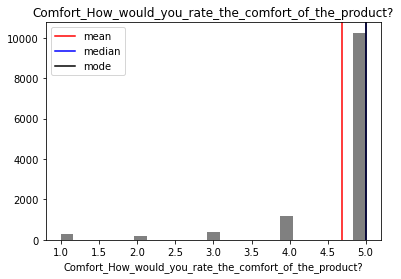

In [19]:
histogram_with_central_tendencies('Comfort_How_would_you_rate_the_comfort_of_the_product?')

- Will do imputation using the median values which is 5
- Do same for the other 2 columns

In [20]:
# Fill NaN with median of column
df['Comfort_How_would_you_rate_the_comfort_of_the_product?'] = df['Comfort_How_would_you_rate_the_comfort_of_the_product?'].fillna(df['Comfort_How_would_you_rate_the_comfort_of_the_product?'].median())

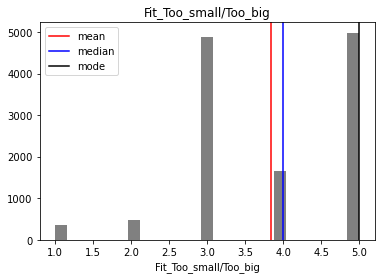

In [21]:
histogram_with_central_tendencies('Fit_Too_small/Too_big')

In [22]:
# Fill NaN with median of column
df['Fit_Too_small/Too_big'] = df['Fit_Too_small/Too_big'].fillna(df['Fit_Too_small/Too_big'].median())

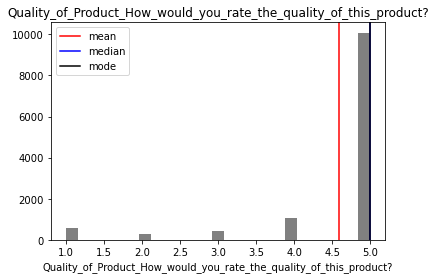

In [23]:
histogram_with_central_tendencies('Quality_of_Product_How_would_you_rate_the_quality_of_this_product?')

In [24]:
# Fill NaN with median of column
df['Quality_of_Product_How_would_you_rate_the_quality_of_this_product?'] = df['Quality_of_Product_How_would_you_rate_the_quality_of_this_product?'].fillna(df['Quality_of_Product_How_would_you_rate_the_quality_of_this_product?'].median())

In [25]:
#Confirm if there are still null values
# Check the percentage of missing/null values 
df.isna().sum()/df.shape[0]*100

Submission_Date                                                       0.0
Initial_Publish_Date                                                  0.0
Moderation_Status                                                     0.0
Product_ID                                                            0.0
Product_Name                                                          0.0
BV_FE_EXPAND                                                          0.0
BV_FE_FAMILY                                                          0.0
BV_FE_FAMILY.1                                                        0.0
Product_Name_CLEAN                                                    0.0
Product_SKU                                                           0.0
Category                                                              0.0
Category_Consolidated                                                 0.0
Review_Title                                                          0.0
User_Nickname                         

In [26]:
# Resetting the index
df = df.reset_index(drop=True)

- Data is clean now, so we draw insights from the data

In [27]:
# categorical data
categorical_df = df[['Category', 'Category_Consolidated', 'Recommend_to_a_Friend', 'Age', 'Reviews']]
categorical_df.head()

,Category,Category_Consolidated,Recommend_to_a_Friend,Age,Reviews
0,6 Vests,Lightweight,Yes,35 to 49,positive
1,3 Midweight Knits,Knitwear,Yes,35 to 49,positive
2,6 Vests,Lightweight,Yes,35 to 49,positive
3,6 Vests,Lightweight,Yes,18 to 24,negative
4,4 Lightweight Jackets,Lightweight,No,50 to 64,positive


In [28]:
# create a function for making bar charts

def bar_for_columns(column,fig_width = 5,fig_height = 5):
    
    plt.figure(figsize = (fig_width,fig_height))
    df[column].value_counts().sort_values().plot(kind = 'bar',color = 'cornflowerblue')
    plt.title(column)
    plt.show()

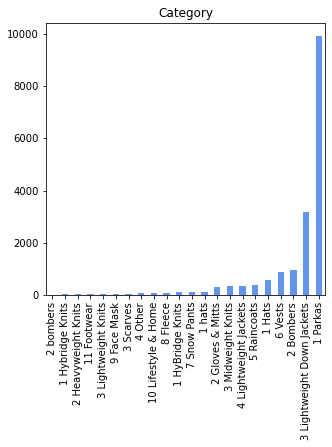

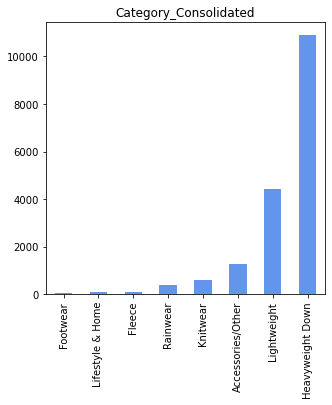

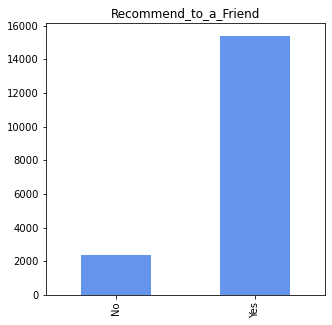

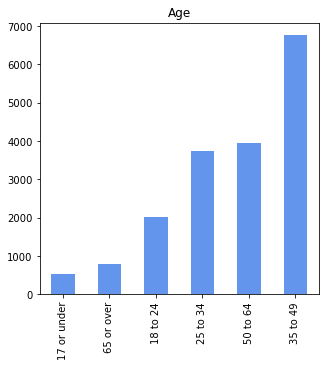

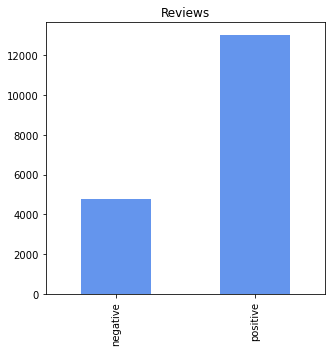

In [29]:
for col in categorical_df.columns:
    
    bar_for_columns(col)

**OBSERVATIONS**
- The Parkas seem to be the product mostly sold by Canada goose
- For the "Beyond the parka" idea, the footwear, hats and knits will be a great idea to expand more
- People also like the heavy weight pants
- Customers are more likely to recommend Canada Goose's products for quality 
- Their customers are mostly older from 35 years to 64 years
- There is need for expansion and more improvement to interest the younger generation
- The reviews are mostly positive which is a great job for the quality and fitting of the product

## Bivariate analysis - numeric variables
- what is the relationship between the target variable and the various descriptor variables

In [30]:
numeric_df = df.select_dtypes(['float64','int64'])
numeric_df.head()

,Overall_Rating,Comfort_How_would_you_rate_the_comfort_of_the_product?,Fit_Too_small/Too_big,Quality_of_Product_How_would_you_rate_the_quality_of_this_product?,#_of_Helpful_Votes,#_of_Not_Helpful_Votes
0,5,5.0,3.0,5.0,0,0
1,5,5.0,4.0,5.0,0,0
2,5,5.0,4.0,5.0,0,0
3,4,4.0,3.0,4.0,0,0
4,5,4.0,3.0,3.0,1,0


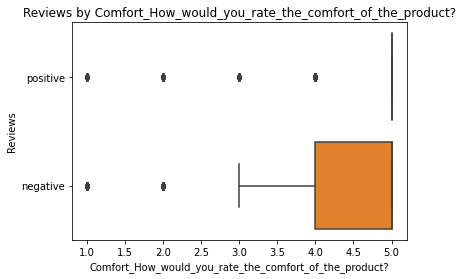

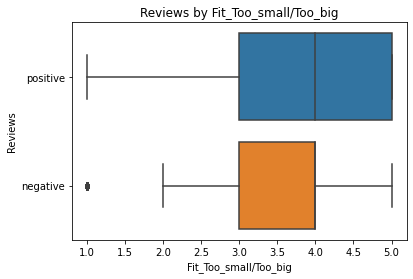

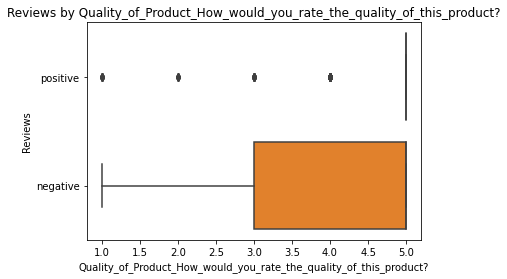

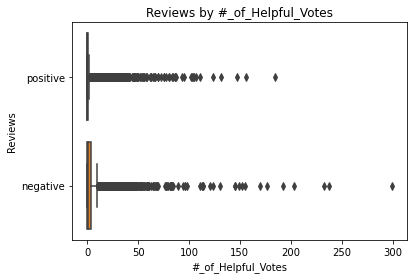

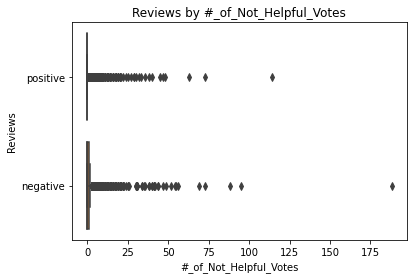

In [34]:
# Converting the registered column to string type so seaborn treats it as a category
for col in numeric_df.columns[1:]: 
    
    # Normalize the histogram by passing in 'stat=density' to account for differences in 
    # counts by class.
    sns.boxplot(x=col, y='Reviews', data=df)
    plt.title(f'Reviews by {col}')
    plt.show()

**Observations**
- Even though the fit too small/ too big, the reviews were mostly positive reviews
- Votes that were considered helpful were both positive and negative 
- We can see an outlier in the number of votes that were not helpful

## Bivariate analysis - categorical variables

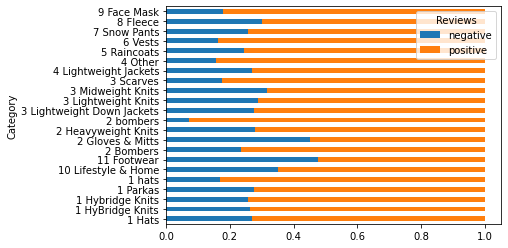

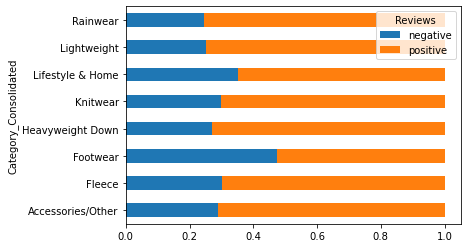

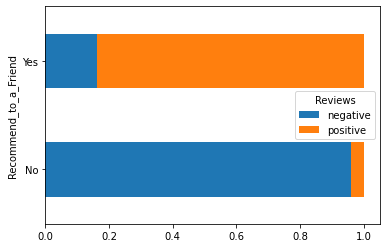

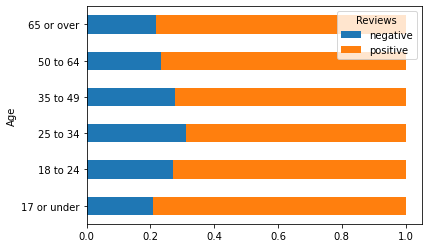

In [35]:
# Iterate over each categorical column 
for column in categorical_df.columns[:-1]:

    pct_review_df = categorical_df.groupby([column, 'Reviews'])[column].count()/df.groupby(column)[column].count()

    pct_review_df.unstack().plot(kind='barh', stacked=True)
    plt.show()

**OBSERVATIONS**
- Even though some customers opted for no recommendation to friends, we can still see they loved their purchase as they gave positive reviews
- There is a slightly higher negative review for footwear and gloves, there is need for improvement in that product aspect as well

In [36]:
# Create dataframe for NLP
df2 = df[['Review_Title', 'Overall_Rating']]
df2 = df2.reset_index(drop=True)
df2

,Review_Title,Overall_Rating
0,Excellent very pretty,5
1,Good looking hoodie,5
2,Great quality vest!,5
3,Super warm vest,4
4,Stylish.,5
...,...,...
17764,Ruin a near perfect thing,3
17765,Drop Tail,4
17766,The Warmest Coat I've Ever Owned,5
17767,Warmth!,5


In [37]:
df2['Overall_Rating'] = np.where(df2['Overall_Rating'] >= 5, 1, 0)

In [38]:
# Define the features(X) and target(y) variables
X = df2['Review_Title']
y = df2['Overall_Rating']

In [39]:
X

0                   Excellent very pretty
1                     Good looking hoodie
2                     Great quality vest!
3                         Super warm vest
4                                Stylish.
                       ...               
17764           Ruin a near perfect thing
17765                           Drop Tail
17766    The Warmest Coat I've Ever Owned
17767                             Warmth!
17768               awesome fit and feel.
Name: Review_Title, Length: 17769, dtype: object

In [40]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import string
from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\audre\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\audre\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [42]:
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only     the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return nouns_adj

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
# 1. Instantiate the model
bagofwords = CountVectorizer(min_df=10, tokenizer=nouns_adj)

# 2. Fit the model
bagofwords.fit(X_train)

# 3. Transform the model
X_train_transformed = bagofwords.transform(X_train)

C:\Users\audre\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


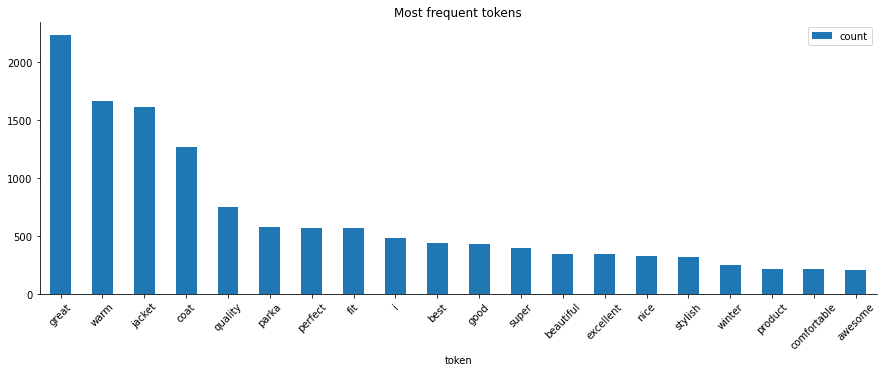

In [44]:
# Checking the most common words seen
words = bagofwords.get_feature_names()
word_counts = X_train_transformed.toarray().sum(axis=0)

# Using a function to visualize it
def plot_most_frequent(words, word_counts, top=20):
    words_df = pd.DataFrame({"token": words, 
                             "count": word_counts})
    
    fig, ax = plt.subplots(figsize=(0.75*top, 5))
    words_df.sort_values(by="count", ascending=False).head(top)\
        .set_index("token")\
        .plot(kind="bar", rot=45, ax=ax)
    sns.despine()
    plt.title("Most frequent tokens")
    plt.show()

plot_most_frequent(words, word_counts)

In [45]:
X_test

1086                                              Perfect!
12402                          Ripped in less then a month
15938                                                   UK
14779                                       Coupe parfaite
4936                           Warm, practical and stylish
                               ...                        
12016                             Very light and Very warm
15870                                     Very warm jacket
6388                      Practically perfect in every way
6922                                        Excellent item
12949    Top de tip top et encore le top des tips.........
Name: Review_Title, Length: 4443, dtype: object

In [46]:
X_test_transformed = bagofwords.transform(X_test)
X_test_transformed

<4443x334 sparse matrix of type '<class 'numpy.int64'>'
	with 7496 stored elements in Compressed Sparse Row format>

In [47]:
# Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.7811046075341438
Test score: 0.7733513391852352


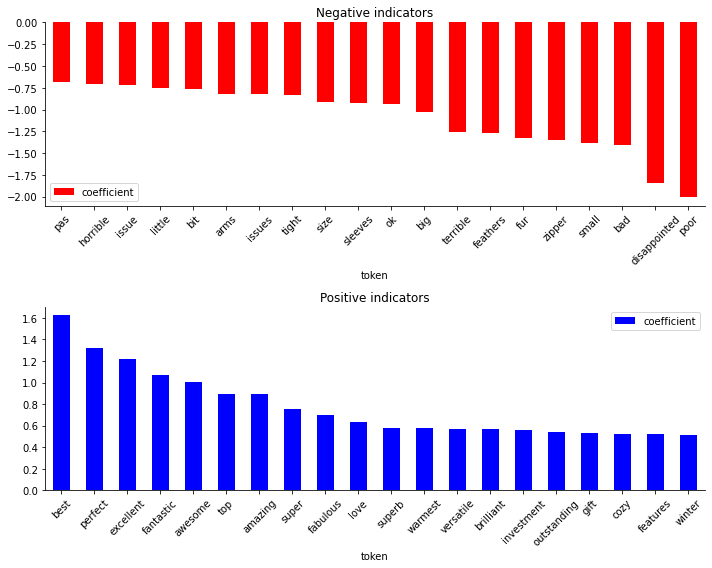

In [48]:
def plot_coefs(logreg, words):
    coef_df = pd.DataFrame({"coefficient": logreg.coef_[0], "token": words})
    coef_df = coef_df.sort_values("coefficient", ascending=False)

    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    # smallest coefficient -> tokens indicating negative sentiment 
    coef_df.tail(20).set_index("token").plot(kind="bar", rot=45, ax=axs[0], color="red")
    axs[0].set_title("Negative indicators")
 

    # largest coefficient -> tokens indicating positive sentiment 
    coef_df.head(20).set_index("token").plot(kind="bar", rot=45, ax=axs[1], color="blue")
    axs[1].set_title("Positive indicators")
    
    sns.despine()
    plt.tight_layout()
    plt.show()
    
plot_coefs(logreg, words)

In [49]:
coef_df = pd.DataFrame({"coefficient": logreg.coef_[0], "token": words})
coef_df1 = coef_df.loc[(coef_df["coefficient"] > 0)]
coef_df1 = coef_df1.sort_values("coefficient", ascending=False)
coef_df1

,coefficient,token
17,1.621675,best
215,1.323055,perfect
86,1.219856,excellent
98,1.068113,fantastic
10,1.004824,awesome
...,...,...
233,0.010228,puffer
206,0.009339,pants
50,0.007640,colour
276,0.005087,sweater


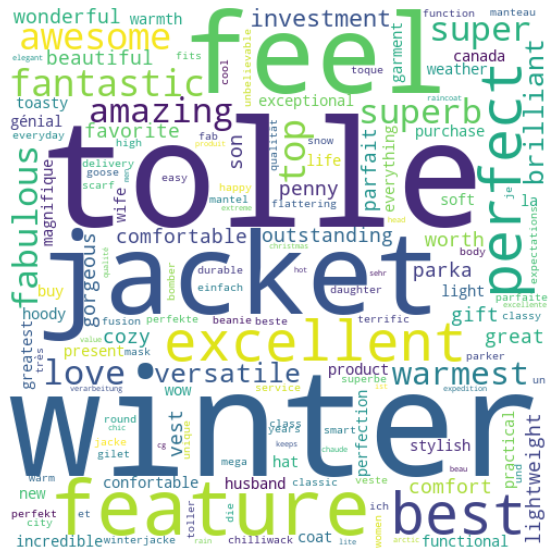

In [50]:
# Visualizing the top positive review words using word cloud
from wordcloud import WordCloud


text = " ".join(token for token in coef_df1.token)

# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(collocations = False, width = 500,  
                      height = 500, max_words =150,
                      background_color = 'white').generate(text)

# Display the generated Word Cloud
fig = plt.figure(figsize=(10,10))
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

plt.show()
word_cloud.to_file('Positive.png')

In [51]:
coef_df2 = coef_df.loc[(coef_df["coefficient"] < 0)]
coef_df2 = coef_df2.sort_values("coefficient", ascending=True)
coef_df2

,coefficient,token
225,-2.007795,poor
75,-1.848410,disappointed
11,-1.410077,bad
262,-1.388822,small
330,-1.352898,zipper
...,...,...
92,-0.006596,experience
164,-0.002692,langford
15,-0.002044,beauty
249,-0.001868,schöne


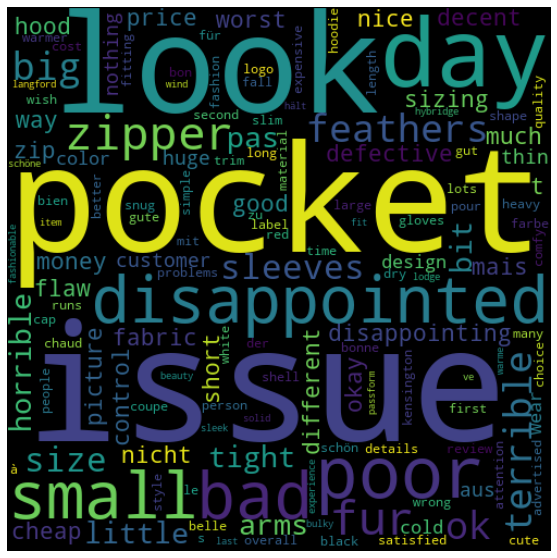

In [52]:
# Visualizing the top negative review words using word cloud
from wordcloud import WordCloud


text1 = " ".join(token for token in coef_df2.token)

# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(collocations = False, width = 500,  
                      height = 500, max_words =150,
                      background_color = 'black').generate(text1)

# Display the generated Word Cloud
plt.figure(figsize=(10,10))
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

plt.show()
word_cloud.to_file('Negative.png')

## CONCLUSIONS AND NEXT STEPS
- We see customer dissatisfaction in the area of footwear and gloves, which points to products in need of improvement
- Also the customer age range is concentrated in the older generation, it will be great to consider the younger generations as they also drive higher sales with more interactions with social apps for product publicity
- From the word cloud, we notice a dissatisfaction with fabrics and materials used in the products such as ('fabric', 'zipper', 'pocket', 'shell', 'fur'), which also draws the attention to more sustainable material sourcing
- Also complaints about fitting ('tight', 'arms', 'short') can be addressed with the AR integrated into the virtual shopping experience